Delivery_time -> Predict delivery time using sorting time|

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


In [2]:
df=pd.read_csv("delivery_time.csv")

In [3]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
df.info

<bound method DataFrame.info of     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

In [5]:
df.shape

(21, 2)

In [6]:
print(df.isnull().sum())


Delivery Time    0
Sorting Time     0
dtype: int64


In [7]:
print(df.describe())

       Delivery Time  Sorting Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000


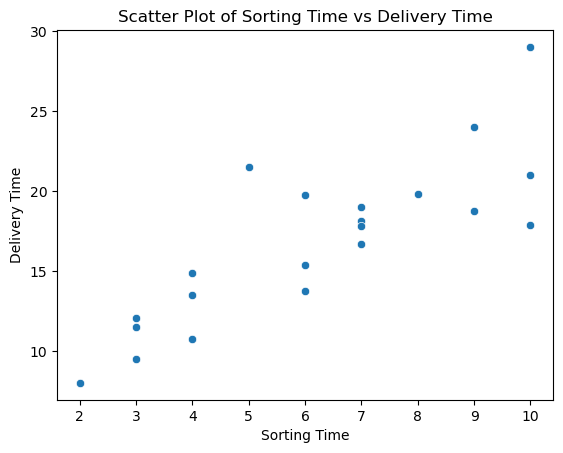

In [8]:
sns.scatterplot(x='Sorting Time', y='Delivery Time', data=df)
plt.title('Scatter Plot of Sorting Time vs Delivery Time')
plt.show()

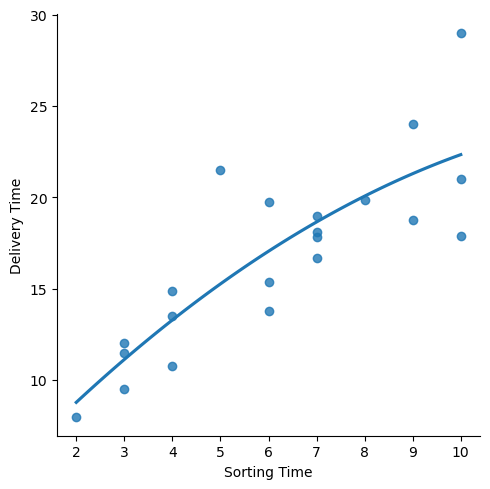

In [9]:
sns.lmplot(x ="Sorting Time", y ="Delivery Time", data = df, order = 2, ci = None)
plt.show()

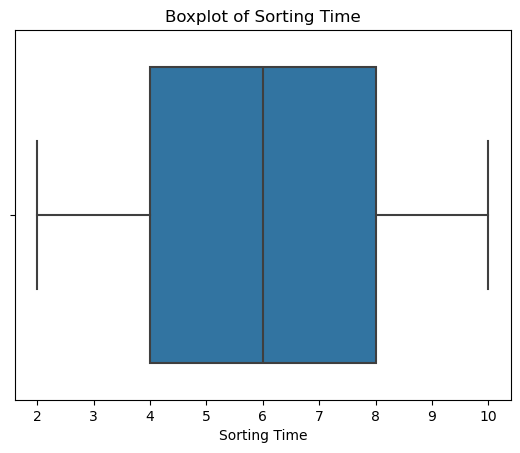

In [10]:
sns.boxplot(x=df['Sorting Time'])
plt.title('Boxplot of Sorting Time')
plt.show()

In [11]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [12]:

X = np.array(df['Sorting Time']).reshape(-1, 1)
y = np.array(df['Delivery Time']).reshape(-1, 1)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)


In [14]:
X_train

array([[ 7],
       [ 3],
       [ 6],
       [ 6],
       [ 4],
       [ 9],
       [ 5],
       [10],
       [ 7],
       [ 8],
       [ 9],
       [ 3],
       [10],
       [ 7],
       [ 6]], dtype=int64)

In [15]:
y_train

array([[18.11],
       [12.03],
       [19.75],
       [13.75],
       [10.75],
       [18.75],
       [21.5 ],
       [21.  ],
       [17.83],
       [19.83],
       [24.  ],
       [ 9.5 ],
       [17.9 ],
       [19.  ],
       [15.35]])

In [16]:
y_test

array([[29.  ],
       [14.88],
       [ 8.  ],
       [16.68],
       [13.5 ],
       [11.5 ]])

In [17]:
lr=LinearRegression()
model=lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.7493864557670142

In [18]:
ypred_test=lr.predict(X_test)
ypred_test

array([[21.73181818],
       [13.70054545],
       [11.02345455],
       [17.71618182],
       [13.70054545],
       [12.362     ]])

In [19]:
ypred_train=lr.predict(X_train)
ypred_train

array([[17.71618182],
       [12.362     ],
       [16.37763636],
       [16.37763636],
       [13.70054545],
       [20.39327273],
       [15.03909091],
       [21.73181818],
       [17.71618182],
       [19.05472727],
       [20.39327273],
       [12.362     ],
       [21.73181818],
       [17.71618182],
       [16.37763636]])

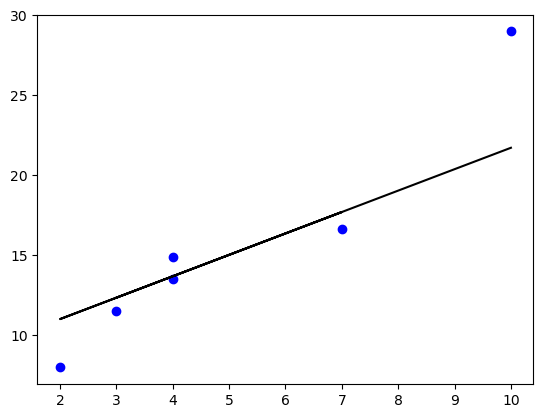

In [20]:

ypred_test = lr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, ypred_test, color ='k')
 
plt.show()

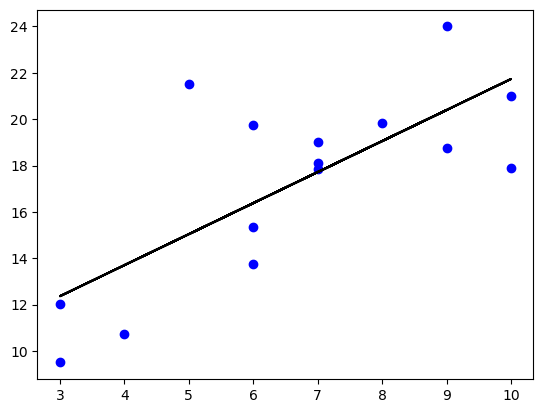

In [21]:

ypred_train = lr.predict(X_train)
plt.scatter(X_train, y_train, color ='b')
plt.plot(X_train, ypred_train, color ='k')
 
plt.show()

In [22]:
from sklearn.metrics import r2_score

In [23]:
final_test=r2_score(y_train,ypred_train)
final_train=r2_score(y_test,ypred_test)

In [24]:
final_test,final_train

(0.541107528373641, 0.7493864557670142)

In [25]:
test=pd.DataFrame({
        'Sorting Time':np.arange(4,10,0.5)})

In [26]:
test

,Sorting Time
0,4.0
1,4.5
2,5.0
3,5.5
4,6.0
5,6.5
6,7.0
7,7.5
8,8.0
9,8.5


In [27]:
model=lr.predict(test)

c:\Users\DELL\anaconda3\envs\kartik_env\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [28]:
test['Delivery_Time_Predict'] = model


In [29]:
test

,Sorting Time,Delivery_Time_Predict
0,4.0,13.700545
1,4.5,14.369818
2,5.0,15.039091
3,5.5,15.708364
4,6.0,16.377636
5,6.5,17.046909
6,7.0,17.716182
7,7.5,18.385455
8,8.0,19.054727
9,8.5,19.724000
